In [7]:
import pandas as pd

df = pd.read_csv('../z20_data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [8]:
df.info()

# item_price가 문자열 형태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [10]:
df.shape
# 행,열 개수

(4622, 5)

In [11]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [12]:
df['order_id'] = df['order_id'].astype(str)  
# order_id 를 문자열 취급

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [39]:
# order_id 주문당 평균 계산금액 출력하시오.
# df['item_price'] = df['item_price'].str.replace('$','').astype(float)
# (df.groupby('order_id')['item_price'].sum())/(df.groupby('order_id')['quantity'].count())
df.groupby('order_id')['item_price'].sum().mean()
# -> 전체 평균


# 한 주문에 10달러 이상 사용한 주문 번호를 출력하시오.
df_sum = df.groupby('order_id').sum()  # quantity 주문량, item_name 주문한음식, item_price 주문금액 더해줌
df_sum[df_sum['item_price'] >= 10].sort_values('item_price',ascending=False).head()


,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30


In [50]:
# item 당 주문개수(quantity) -> order_id에 따라 몇 번 주문되었는지(한 주문에 2개 시켰어도 count는 1번)
df.groupby('item_name')['order_id'].count()


item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [48]:
# item 당 주문개수 합  -> 메뉴가 만들어진 총 개수
df.groupby('item_name')['quantity'].value_counts()   # -> sum(주문량 * 횟수) = sum()
df.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [54]:
df[df['item_name'] == 'Bottled Water']['quantity'].sort_values(ascending=False) 
# 한 번 주문하는데 물을 10병 시킨사람이 있네

4152    10
3599     7
2441     5
1425     4
1880     4
        ..
2242     1
2278     1
2294     1
2333     1
4614     1
Name: quantity, Length: 162, dtype: int64

<BarContainer object of 5 artists>

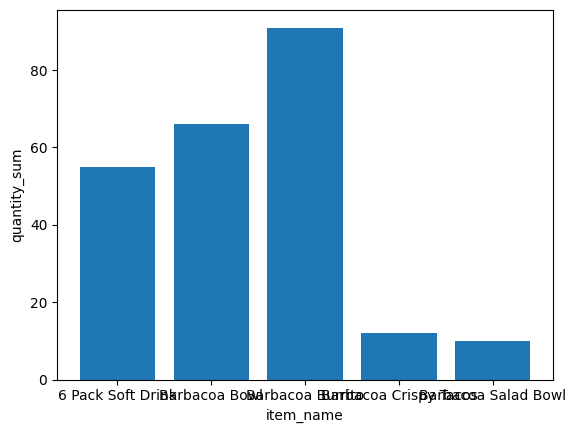

In [70]:
# 막대그래프를 그려보세요!
x = df.groupby('item_name')['quantity'].sum().head().index
y = df.groupby('item_name')['quantity'].sum().head().values

import matplotlib.pyplot as plt

plt.xlabel('item_name')
plt.ylabel('quantity_sum')
plt.bar(x,y)

In [81]:
# 각 아이템의 가격을 구하시오
## 주문이 1개이면서 
qu_df = df[df['quantity'] == 1]
## 같은 item_name 중에서 최저가격인
groupby_df = qu_df.groupby('item_name').min()
## 높은 가격을 가지는 item_name 순으로 정렬
groupby_df.sort_values('item_price',ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [112]:
## 금액이 가장 높게 나온 주문번호에서 item이 총 몇개 주문되었는지 출력하시오
order_id_df = df.groupby('order_id').sum()   # -> order_id의 모든 주문 합계서
order_id_df.sort_values('item_price',ascending=False)   #  -> 주문 합계가 가장 큰 순으로 정렬

top1 = order_id_df['item_price'].idxmax()  # order_id가 926번이 총 주문금액수 1위

# item 당 주문한 개수
df[df['order_id']==top1].groupby('item_name')['quantity'].count()
# df[df['order_id']==top1].groupby('item_name')['quantity'].sum()

item_name
Barbacoa Burrito      1
Chicken Bowl          9
Chicken Burrito       4
Chicken Salad Bowl    1
Steak Bowl            5
Steak Burrito         2
Veggie Bowl           1
Name: quantity, dtype: int64

In [127]:
## Chicken Bowl를 2개 이상, 주문한 횟수가 몇번인지 출력하시오
item_chicken_bowl = df[df['item_name'] == 'Chicken Bowl']
item_chicken_bowl[item_chicken_bowl['quantity'] >= 2]

# Chicken bowl의 총 매출액을 출력
item_chicken_bowl['item_price'].sum()

# 총 매출액 대비 Chicken bowl의 매출액 비율
all_total = df['item_price'].sum()
chick_total = item_chicken_bowl['item_price'].sum()

chick_percent = round((chick_total/all_total)*100,2).astype(str)+'%'
print('총 매출액 대비 Chicken Bowl의 매출액 비율 : ',chick_percent)

총 매출액 대비 Chicken Bowl의 매출액 비율 :  21.28%
